# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [6]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#ConfusionMatrixDisplay.from_estimator(clf, X_train,y_train, display_labels=['Died', 'Survived']);
#plt.show()

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

arquivo = pd.read_csv('Arquivo_tarefa11_AD.csv')
df = pd.DataFrame(arquivo)
df


,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,1,1,0,58.832877,3.106849,1,0,0,...,True,False,False,False,False,True,False,False,False,False
1,1,1,0,1,0,52.356164,8.358904,1,0,1,...,False,False,True,False,False,True,False,False,False,False
2,2,1,0,1,0,52.356164,8.358904,1,0,1,...,False,False,True,False,False,True,False,False,False,False
3,3,0,1,1,0,46.224658,2.106849,1,1,1,...,True,False,False,False,False,True,False,False,False,False
4,4,1,1,0,0,29.230137,3.021918,1,0,0,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,0,1,0,54.109589,9.884932,1,0,0,...,False,False,False,False,False,True,False,False,False,False
16646,16646,1,0,1,0,43.389041,7.380822,1,1,1,...,True,False,False,False,False,True,False,False,False,False
16647,16647,0,1,1,0,30.005479,9.800000,1,1,0,...,True,False,False,False,False,True,False,False,False,False
16648,16648,0,1,1,0,30.005479,9.800000,1,1,0,...,True,False,False,False,False,True,False,False,False,False


In [11]:
y = df['mau']
df.drop(columns=['mau','Unnamed: 0'], inplace=True)

In [13]:
y.value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

In [15]:
(list(df.columns))

['sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'idade',
 'tempo_emprego',
 'possui_celular',
 'possui_fone_comercial',
 'possui_fone',
 'possui_email',
 'qt_pessoas_residencia',
 'tipo_renda_Commercial associate',
 'tipo_renda_Pensioner',
 'tipo_renda_State servant',
 'tipo_renda_Student',
 'tipo_renda_Working',
 'educacao_Academic degree',
 'educacao_Higher education',
 'educacao_Incomplete higher',
 'educacao_Lower secondary',
 'educacao_Secondary / secondary special',
 'estado_civil_Civil marriage',
 'estado_civil_Married',
 'estado_civil_Separated',
 'estado_civil_Single / not married',
 'estado_civil_Widow',
 'tipo_residencia_Co-op apartment',
 'tipo_residencia_House / apartment',
 'tipo_residencia_Municipal apartment',
 'tipo_residencia_Office apartment',
 'tipo_residencia_Rented apartment',
 'tipo_residencia_With parents']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [20]:
clf = DecisionTreeClassifier(random_state = 100)

In [22]:
clf = clf.fit(x_train,y_train)

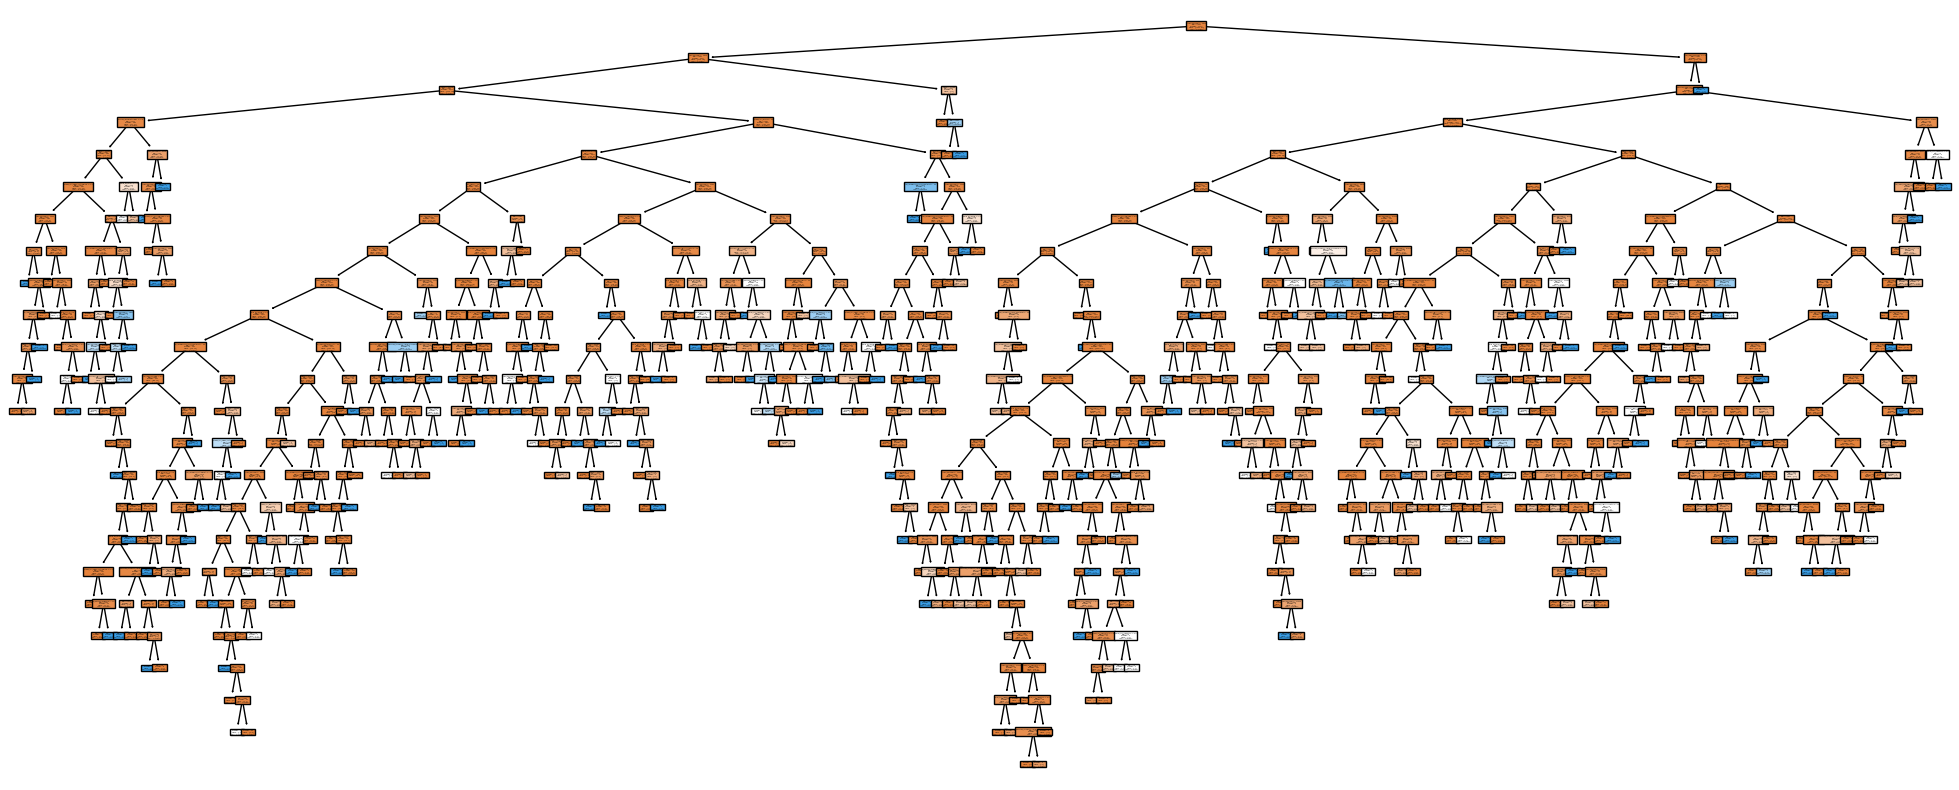

In [24]:
plt.figure(figsize = (25,10))
plot_tree(clf, filled = True, class_names=['Aprovados','Reprovados'], feature_names=x_train.columns)
plt.show()

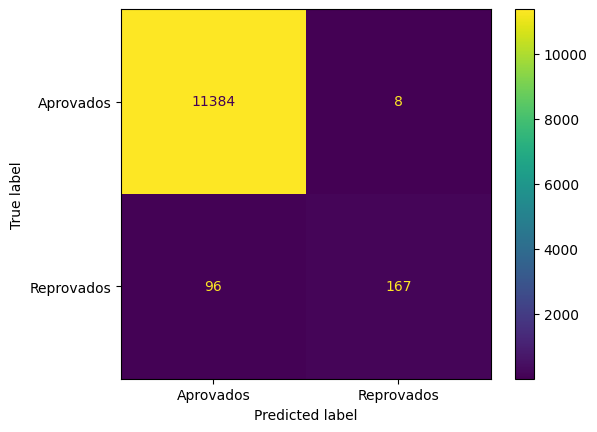

In [26]:
ConfusionMatrixDisplay.from_estimator(clf, x_train,y_train, display_labels=['Aprovados', 'Reprovados'])
plt.show()

In [30]:
predict = clf.predict(x_train)
predict

array([False, False, False, ..., False, False, False])

In [32]:
y_train.shape

(11655,)

In [34]:
accuracy_score(y_train, predict)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

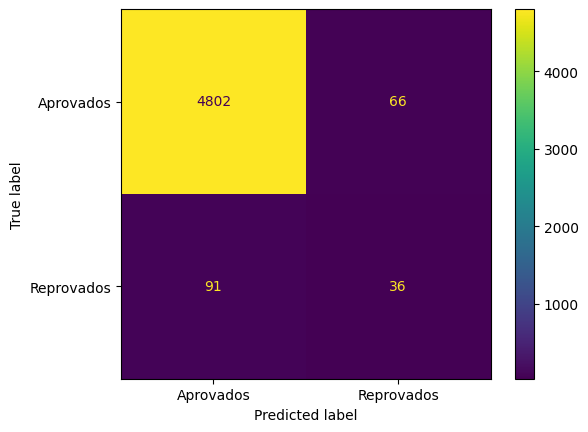

In [37]:
ConfusionMatrixDisplay.from_estimator(clf, x_test,y_test, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [39]:
predict_teste = clf.predict(x_test)
accuracy_score(y_test, predict_teste)

0.9685685685685685

In [41]:
clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf = 5, random_state = 123)

In [43]:
clf2 = clf2.fit(df,y)

In [45]:
#Comparando a matriz de confusao inicial com a nova modificada

In [47]:
#Matriz Inicial

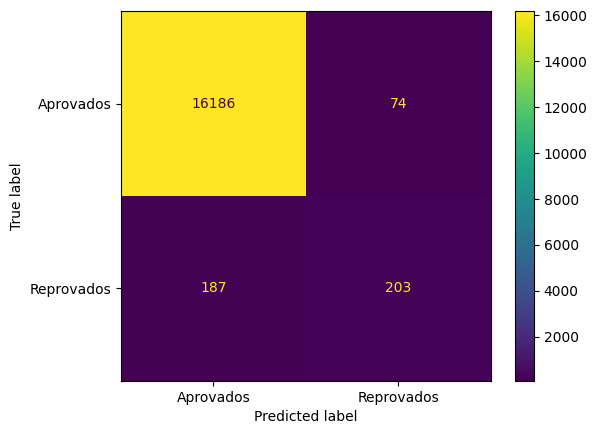

In [49]:
ConfusionMatrixDisplay.from_estimator(clf, df,y, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [51]:
predict = clf.predict(df)
accuracy_score(y, predict)

0.9843243243243244

In [53]:
#Matriz Modificada

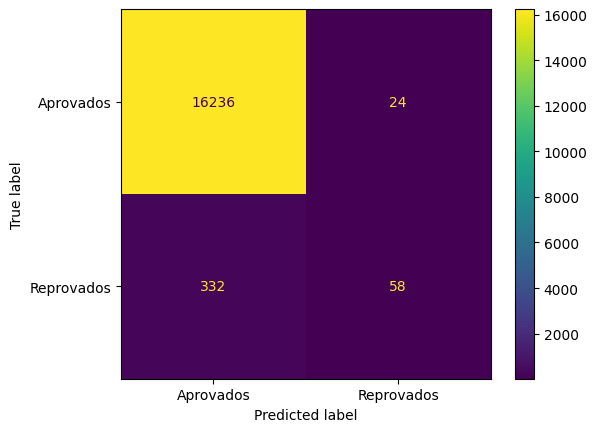

In [55]:
ConfusionMatrixDisplay.from_estimator(clf2, df,y, display_labels=['Aprovados', 'Reprovados']);
plt.show()

In [57]:
predict = clf2.predict(df)
accuracy_score(y, predict)

0.9786186186186187

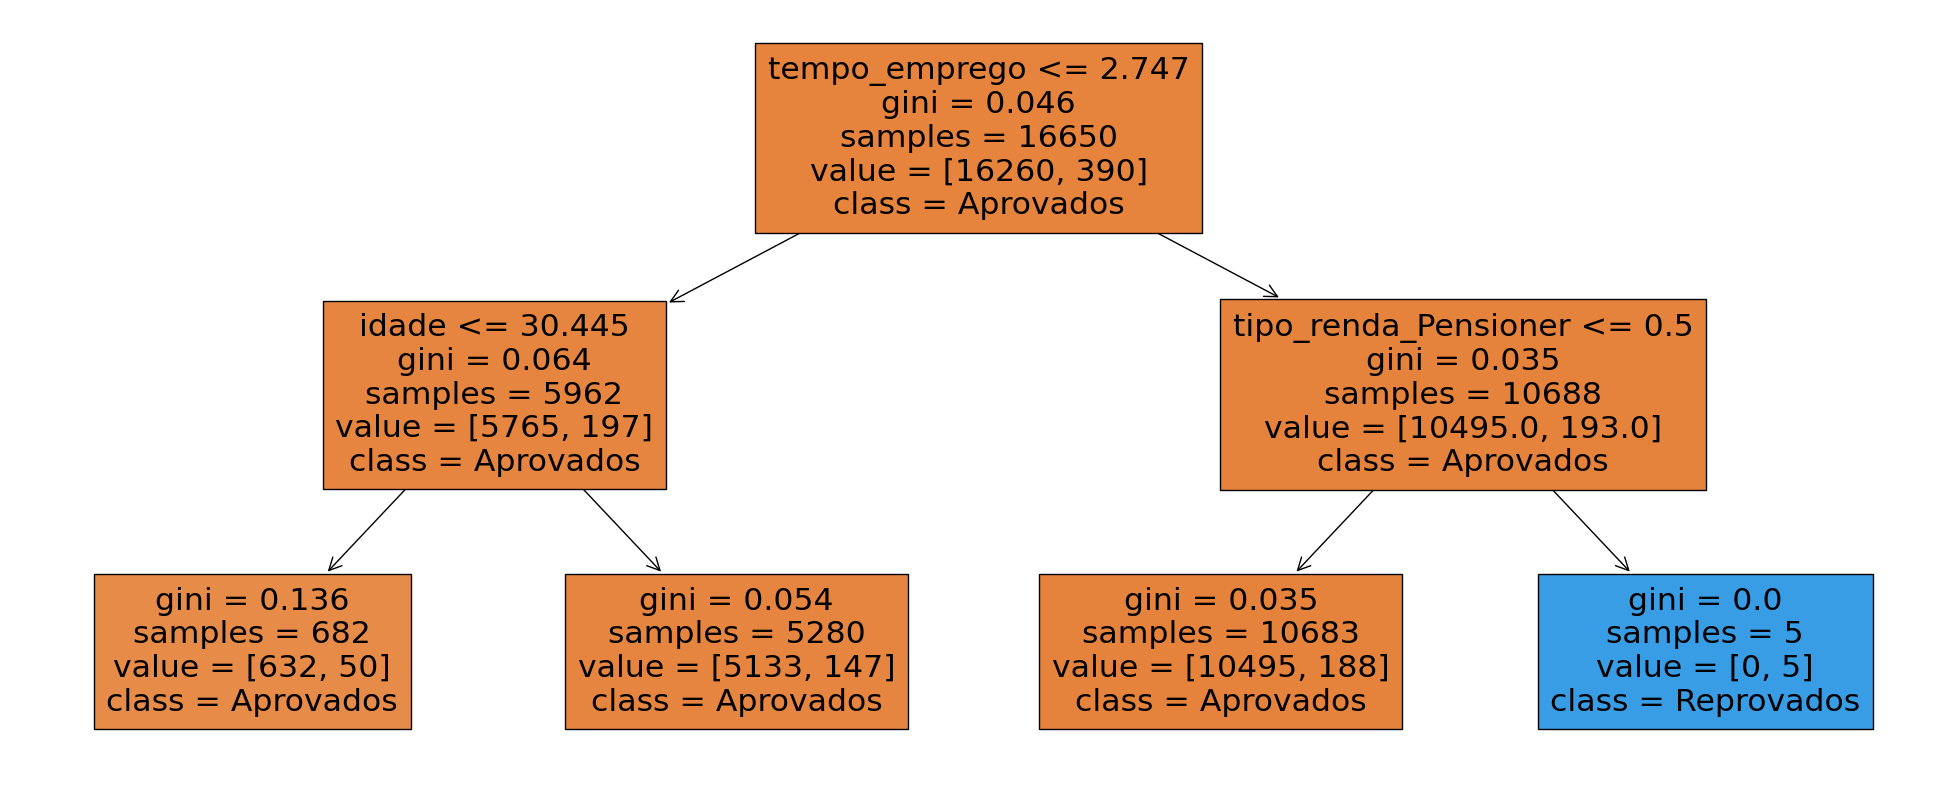

In [59]:
clf3 = DecisionTreeClassifier(max_depth=2, min_samples_leaf = 5, random_state = 123)
clf3 = clf3.fit(df,y)
plt.figure(figsize = (25,10))
plot_tree(clf3, filled = True, class_names=['Aprovados','Reprovados'], feature_names=df.columns)
plt.show()

In [ ]:
#Verificando as mudanças feitas o clf2 se tornou um pouco menos preciso ao se dimminuir o tamanho da árvore e o número mínimo de amostras

In [65]:
y.value_counts()

mau
False    16260
True       390
Name: count, dtype: int64

In [69]:
#5 Se todos os contratos fossem classificados como 'bons':
16260/(16260+390)

0.9765765765765766

In [ ]:
#Se todos os contratos fossem classificados como 'bons'a acurácia seria de 97%